<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/anova1_regresion_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo
En un experimento para determinar el efecto de la nutrición sobre los niveles de atención de alumnos de primaria, se asignó aleatoriamente 15 estudiantes a uno de tres tratamientos: sin desayuno, desayuno ligero y desayuno completo. Se registraron los niveles de atención (en minutos) durante un período de lectura matutino. La tabla siguiente contiene los datos obtenidos.  

|  | Sin desayuno | Desayuno ligero | Desayuno completo |  |
| :---: | :---: | :---: | :---: | :---: |
|  | 8 | 14 | 10 |  |
|  | 7 | 16 | 12 |  |
|  | 9 | 12 | 16 |  |
|  | 13 | 17 | 15 |  |
|  | 10 | 11 | 12 |  |
| Total | 47 | 70 | 65 | 182 |
| Promedio | 9.4 | 14 | 13 | 12.13 |

Los datos de un diseño a una vía pueden ser digitados en un script, incluyendo en un vector los registros de la variable respuesta, en este caso los tiempos de atención y en otro vector los identificadores de los tratamientos a los cuales pertenece cada observación, es decir, el tipo de desayuno. Para indicar que se debe considerar grupos de acuerdo con el desayuno que recibió cada niño, se establece que esta variable es el factor; esto se logra con la función factor (). El código para la lectura de los datos es:

In [1]:
import pandas as pd

atencion = [8, 7, 9, 13, 10, 14, 16, 12, 17, 11, 10, 12, 16, 15, 12]
desayuno = ["ND", "ND", "ND", "ND", "ND", "DL", "DL", "DL", "DL", "DL", "DC", "DC", "DC", "DC", "DC"]

# Crear una serie con los datos
data = pd.Series(atencion, index=desayuno, name="Atencion")

print(data)


ND     8
ND     7
ND     9
ND    13
ND    10
DL    14
DL    16
DL    12
DL    17
DL    11
DC    10
DC    12
DC    16
DC    15
DC    12
Name: Atencion, dtype: int64


In [2]:
import pandas as pd

atencion = [8, 7, 9, 13, 10, 14, 16, 12, 17, 11, 10, 12, 16, 15, 12]
desayuno = ["ND", "ND", "ND", "ND", "ND", "DL", "DL", "DL", "DL", "DL", "DC", "DC", "DC", "DC", "DC"]

# Convertir a tipo categórico
desayuno = pd.Categorical(desayuno, categories=["ND", "DL", "DC"], ordered=True)

# Crear una serie con los datos
data = pd.Series(atencion, index=desayuno, name="Atencion")

print(data)


ND     8
ND     7
ND     9
ND    13
ND    10
DL    14
DL    16
DL    12
DL    17
DL    11
DC    10
DC    12
DC    16
DC    15
DC    12
Name: Atencion, dtype: int64


In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos
atencion = [8, 7, 9, 13, 10, 14, 16, 12, 17, 11, 10, 12, 16, 15, 12]
desayuno = ["ND", "ND", "ND", "ND", "ND", "DL", "DL", "DL", "DL", "DL", "DC", "DC", "DC", "DC", "DC"]

# Crear un DataFrame
df = pd.DataFrame({"Atencion": atencion, "Desayuno": desayuno})

# Realizar ANOVA
model = ols('Atencion ~ Desayuno', data=df).fit()
anova_table = sm.stats.anova_lm(model)

# Imprimir resultados
print(anova_table)


            df     sum_sq    mean_sq         F    PR(>F)
Desayuno   2.0  58.533333  29.266667  4.932584  0.027326
Residual  12.0  71.200000   5.933333       NaN       NaN


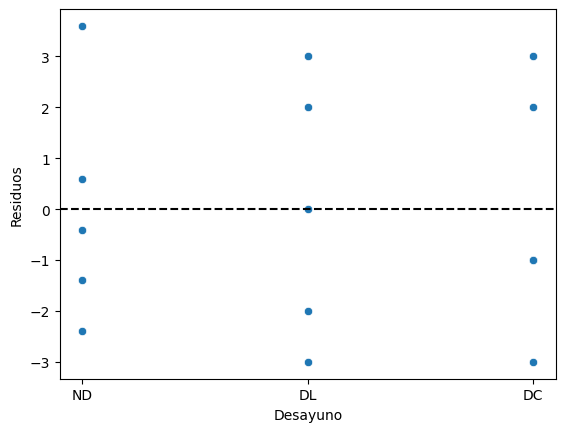

In [6]:
# Gráfico de residuos
import matplotlib.pyplot as plt

import seaborn as sns
sns.scatterplot(x=df["Desayuno"], y=model.resid)
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel("Residuos")
plt.show()

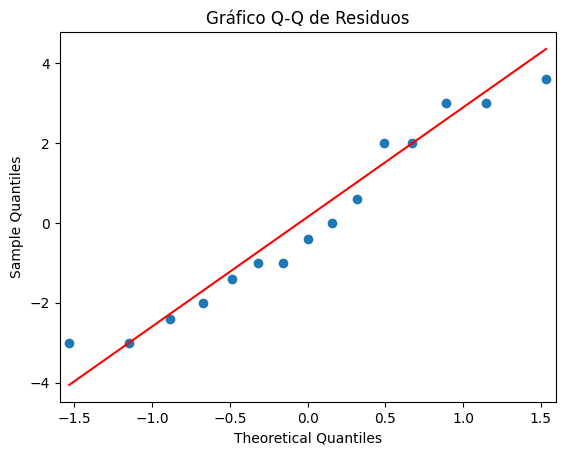

In [7]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Utilizamos el modelo ya ajustado 'model'
residuos = model.resid

# Gráfico Q-Q
sm.qqplot(residuos, line='q')
plt.title("Gráfico Q-Q de Residuos")
plt.show()


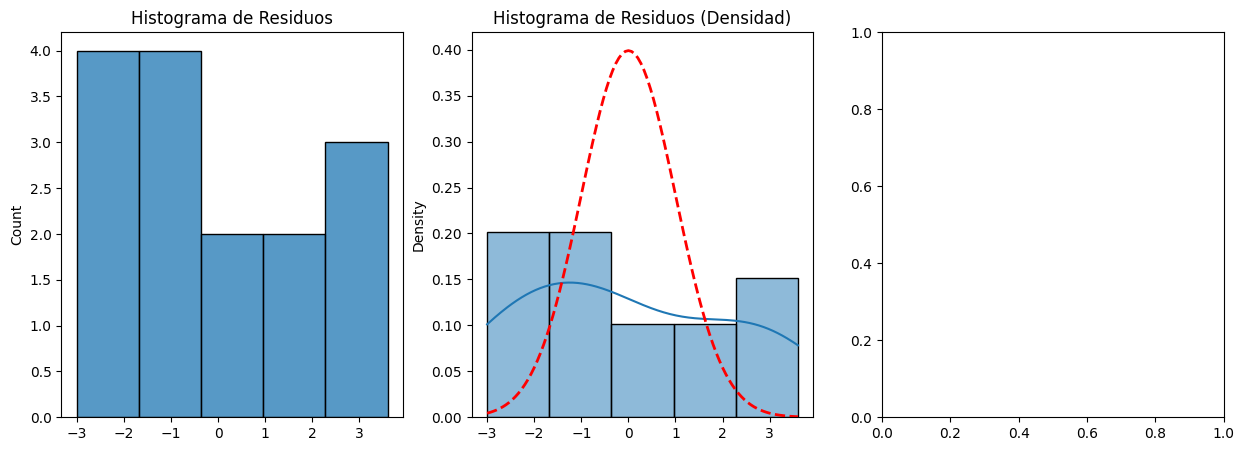

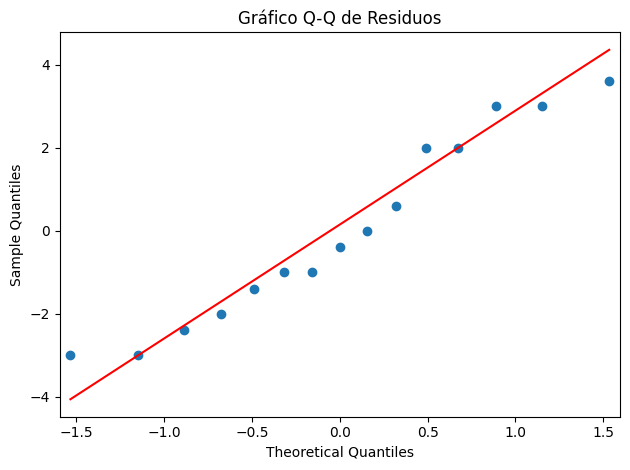

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Utilizamos el modelo ya ajustado 'model'
residuos = model.resid

# Gráficos de histograma
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(residuos, kde=False)
plt.title("Histograma de Residuos")

plt.subplot(132)
sns.histplot(residuos, kde=True, stat="density")
x = np.linspace(min(residuos), max(residuos), 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='red', linestyle='dashed', linewidth=2)
plt.title("Histograma de Residuos (Densidad)")

# Gráfico Q-Q
plt.subplot(133)
sm.qqplot(residuos, line='q')
plt.title("Gráfico Q-Q de Residuos")

plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import shapiro

# Utilizamos el modelo ya ajustado 'model'
residuos = model.resid

# Prueba de normalidad de Shapiro-Wilk
stat, p_value = shapiro(residuos)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)

# Decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula, los residuos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula, los residuos siguen una distribución normal.")


Estadístico de prueba: 0.9272865056991577
Valor p: 0.2484569400548935
No se puede rechazar la hipótesis nula, los residuos siguen una distribución normal.


In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos
y = [8, 7, 9, 13, 10, 14, 16, 12, 17, 11, 10, 12, 16, 15, 12]
desayuno = ["ND", "ND", "ND", "ND", "ND", "DL", "DL", "DL", "DL", "DL", "DC", "DC", "DC", "DC", "DC"]

# Crear un DataFrame
df = pd.DataFrame({"Atencion": y, "Desayuno": desayuno})

# Calcular las medianas por grupo
med = df.groupby("Desayuno")["Atencion"].median()

# Calcular los residuos absolutos
aresid = abs(df["Atencion"] - med[df["Desayuno"]])

# Realizar ANOVA sobre los residuos
model = ols('residuos ~ C(Desayuno)', data=df).fit()
anova_table = sm.stats.anova_lm(model)

# Imprimir resultados
print(anova_table)


               df        sum_sq       mean_sq             F  PR(>F)
C(Desayuno)   2.0  1.055410e-31  5.277048e-32  8.893901e-33     1.0
Residual     12.0  7.120000e+01  5.933333e+00           NaN     NaN


In [12]:
from scipy.stats import levene
import pandas as pd

# Datos
y = [8, 7, 9, 13, 10, 14, 16, 12, 17, 11, 10, 12, 16, 15, 12]
desayuno = ["ND", "ND", "ND", "ND", "ND", "DL", "DL", "DL", "DL", "DL", "DC", "DC", "DC", "DC", "DC"]

# Crear un DataFrame
df = pd.DataFrame({"Atencion": y, "Desayuno": desayuno})

# Realizar la prueba de Levene
statistic, p_value = levene(*[df["Atencion"][df["Desayuno"] == grupo] for grupo in df["Desayuno"]])

print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

# Decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula, no hay igualdad de varianzas.")
else:
    print("No se puede rechazar la hipótesis nula, hay igualdad de varianzas.")


Estadístico de prueba: 0.06122448979591834
Valor p: 0.9999993587567183
No se puede rechazar la hipótesis nula, hay igualdad de varianzas.


In [13]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

# Datos
y = [8, 7, 9, 13, 10, 14, 16, 12, 17, 11, 10, 12, 16, 15, 12]
desayuno = ["ND", "ND", "ND", "ND", "ND", "DL", "DL", "DL", "DL", "DL", "DC", "DC", "DC", "DC", "DC"]

# Crear un DataFrame
df = pd.DataFrame({"Atencion": y, "Desayuno": desayuno})

# Calcular las medias por grupo
medias_por_grupo = df.groupby("Desayuno")["Atencion"].mean()
print(medias_por_grupo)

# Realizar ANOVA
modelo_anova = ols('Atencion ~ Desayuno', data=df).fit()

# Realizar la prueba de Tukey HSD
tukey_results = pairwise_tukeyhsd(df['Atencion'], df['Desayuno'], alpha=0.05)

# Imprimir resultados
print(tukey_results.summary())


Desayuno
DC    13.0
DL    14.0
ND     9.4
Name: Atencion, dtype: float64
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
    DC     DL      1.0 0.7964 -3.11  5.11  False
    DC     ND     -3.6 0.0887 -7.71  0.51  False
    DL     ND     -4.6 0.0284 -8.71 -0.49   True
------------------------------------------------


Estos resultados permiten determinar que los tiempos promedio de atención que no presentan diferencias
significativas son entre aquellos grupos que recibieron desayuno ligero, en comparación con desayuno completo, así como entre no brindar desayuno y tener desayuno completo. Lo anterior se concluye puesto que el
intervalo de confianza para la diferencia de promedios contienen el valor de cero o notando que el valor–p en
cada uno de estos dos casos es mayor que 0.05

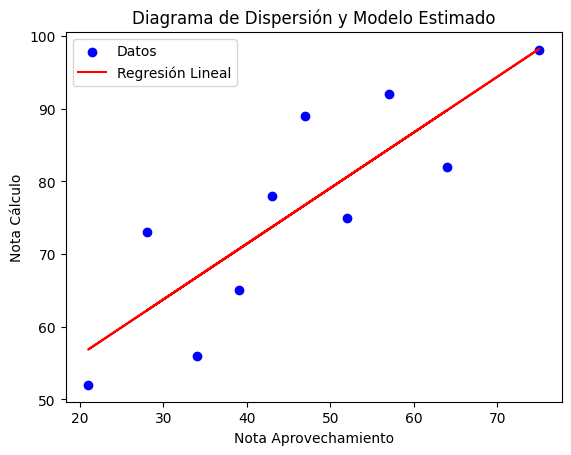

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 07 Oct 2023   Prob (F-statistic):            0.00236
Time:                        03:55:16   Log-Likelihood:                -34.711
No. Observations:                  10   AIC:                             73.42
Df Residuals:                       8   BIC:                             74.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.7842      8.507      4.794      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Datos
x = [39, 43, 21, 64, 57, 47, 28, 75, 34, 52]
y = [65, 78, 52, 82, 92, 89, 73, 98, 56, 75]

# Diagrama de dispersión
plt.scatter(x, y, color='blue', label='Datos')
plt.title("Diagrama de Dispersión y Modelo Estimado")
plt.xlabel("Nota Aprovechamiento")
plt.ylabel("Nota Cálculo")

# Ajuste del modelo de regresión lineal
X = sm.add_constant(x)
modelo = sm.OLS(y, X).fit()

# Línea de regresión
plt.plot(x, modelo.predict(X), color='red', label='Regresión Lineal')

plt.legend()
plt.show()

# Resumen del modelo
print(modelo.summary())


In [15]:
# Intervalos de confianza
intervalos_confianza = modelo.conf_int(alpha=0.05)

# Imprimir los intervalos de confianza
print("Intervalos de Confianza (95%):")
print(intervalos_confianza)


Intervalos de Confianza (95%):
[[21.1672977  60.40101273]
 [ 0.36204579  1.1690779 ]]


In [18]:
modelo.predict([1,60])

array([86.7178658])

In [23]:
from statsmodels.stats.anova import anova_lm

# Añadir la constante al conjunto de datos
X = sm.add_constant(x)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Realizar ANOVA
anova_result = anova_lm(modelo, typ=2)

# Imprimir resultados
print("Análisis de Varianza (ANOVA):")
print(anova_result)


AttributeError: ignored

In [26]:
import numpy as np
from scipy.stats import shapiro, anderson, cramervonmises, skew, kurtosis
from statsmodels.stats.stattools import jarque_bera

# Residuos
residuos = modelo.resid

# Prueba de Shapiro-Wilks
shapiro_p_value = shapiro(residuos)[1]
print(f"Prueba de Shapiro-Wilks: {shapiro_p_value}")

# Prueba de Anderson-Darling
anderson_p_value = anderson(residuos, dist='norm')[1]
print(f"Prueba de Anderson-Darling: {anderson_p_value}")

# Prueba de Cramer von Mises
#cvm_p_value = cramervonmises(residuos)[1]
#print(f"Prueba de Cramer von Mises: {cvm_p_value}")

# Medida de sesgo y curtosis
sesgo = skew(residuos)
curtosis = kurtosis(residuos)

print(f"Sesgo: {sesgo}")
print(f"Curtosis: {curtosis}")

# Prueba de Jarque-Bera
jarque_bera_p_value = jarque_bera(residuos)[1]
print(f"Prueba de Jarque-Bera: {jarque_bera_p_value}")


Prueba de Shapiro-Wilks: 0.3262782692909241
Prueba de Anderson-Darling: [0.501 0.57  0.684 0.798 0.95 ]
Sesgo: 0.29548234326154676
Curtosis: -1.3816973244888866
Prueba de Jarque-Bera: 0.6246993774216165


In [27]:
from scipy.stats import levene

# Residuos
residuos = modelo.resid

# Dividir los residuos en dos grupos según la mediana de x
residuos_baja_x = residuos[x < np.median(x)]
residuos_alta_x = residuos[x > np.median(x)]

# Prueba de Levene
levene_p_value = levene(residuos_baja_x, residuos_alta_x)[1]
print(f"Prueba de Levene: {levene_p_value}")


Prueba de Levene: 0.9272668479094679
